# `pycapse` usage example

In this notebook, we'll show how to use `pycapse` to predict the CMB angular power spectra.

## Loading relevant libraries

The first step is to import the relevant libraries

In [1]:
import numpy as np
import json
import pycapse as pc
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Loading the trained emulator
After succesfully loading `pycapse`, we need to load the trained emulator.
This step requires:
- a dictionary, containing info on the architecture of the emulator (here provided with a JSON file)
- the trained weights and biases
- the $\ell$-grid
- the arrays to perform the minmax normalization of the input and output features.

In [2]:
f = open('nn_setup.json')
 
# returns JSON object as
# a dictionary
nn_setup = json.load(f)

l = np.load("l.npy")[2:5001]

weights_TT = np.load("weights_TT_lcdm.npy")
trained_emu_TT = pc.init_emulator(nn_setup, weights_TT, pc.simplechainsemulator)
emu_tt = pc.cl_emulator(trained_emu_TT, l, np.load("inMinMax_lcdm.npy"), np.load("outMinMaxCℓTT_lcdm.npy"))

weights_EE = np.load("weights_EE_lcdm.npy")
trained_emu_EE = pc.init_emulator(nn_setup, weights_EE, pc.simplechainsemulator)
emu_ee = pc.cl_emulator(trained_emu_EE, l, np.load("inMinMax_lcdm.npy"), np.load("outMinMaxCℓEE_lcdm.npy"))

weights_TE = np.load("weights_TE_lcdm.npy")
trained_emu_TE = pc.init_emulator(nn_setup, weights_TE, pc.simplechainsemulator)
emu_te = pc.cl_emulator(trained_emu_TE, l, np.load("inMinMax_lcdm.npy"), np.load("outMinMaxCℓTE_lcdm.npy"))

weights_PP = np.load("weights_PP_lcdm.npy")
trained_emu_PP = pc.init_emulator(nn_setup, weights_PP, pc.simplechainsemulator)
emu_pp = pc.cl_emulator(trained_emu_PP, l, np.load("inMinMax_lcdm.npy"), np.load("outMinMaxCℓPP_lcdm.npy"))

After loading the emulators, we can retrieve some information on them using the `get_description` function

In [3]:
pc.get_emulator_description(emu_tt)

The parameters the model has been trained are, in the following order: ln10As, ns, H0, ωb, ωc, τ.
The emulator has been trained by Marco Bonici.
Marco Bonici email is bonici.marco@gmail.com.
The emulator has been trained on the high-precision-settings prediction as computed by the CAMB Boltzmann solver.


## Running the code
Now we can actually run the code!
The first time you run this cell, it will take some time, since `Julia` needs to precompile the first time you call a function.

In [4]:
cosmo = np.array([3.05, 0.86, 67., 0.0206263, 0.1492, 0.068604])
test_TT = pc.compute_Cl(cosmo, emu_tt)
test_EE = pc.compute_Cl(cosmo, emu_ee)
test_TE = pc.compute_Cl(cosmo, emu_te)
test_PP = pc.compute_Cl(cosmo, emu_pp)
%timeit pc.compute_Cl(cosmo, emu_tt)

56.9 µs ± 329 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


We can also see the performance of the code using a vectorized version of the function

In [5]:
cosmo_vec = np.vstack([cosmo]*100)
test_TT_vec = pc.compute_Cl_vec(cosmo_vec, emu_tt)
%timeit pc.compute_Cl_vec(cosmo_vec, emu_tt)

6.84 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can check that the calculation of the standard and vectorized functions are the same

In [6]:
np.allclose(test_TT_vec[:,0], test_TT)

True

Let's plot the result of our calculations.

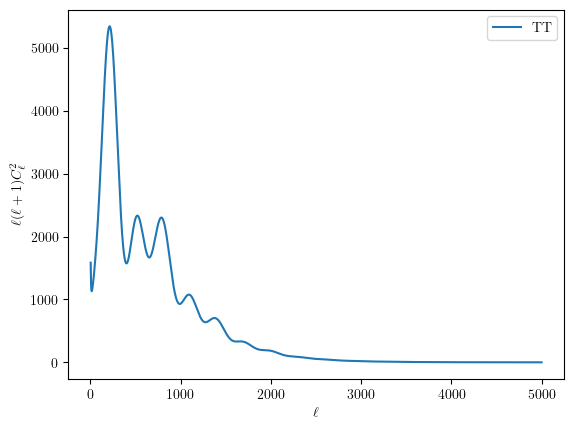

In [7]:
plt.plot(l, test_TT, label = "TT")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^2$')
plt.legend()

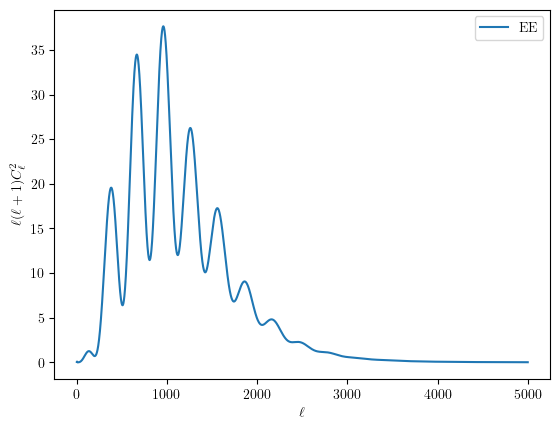

In [8]:
plt.plot(l, test_EE, label = "EE")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^2$')
plt.legend()

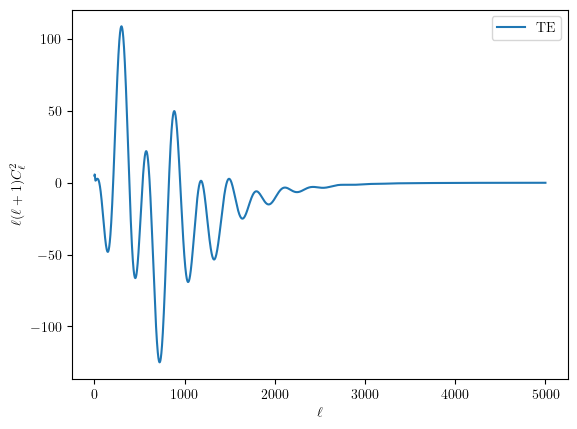

In [9]:
plt.plot(l, test_TE, label = "TE")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^2$')
plt.legend()

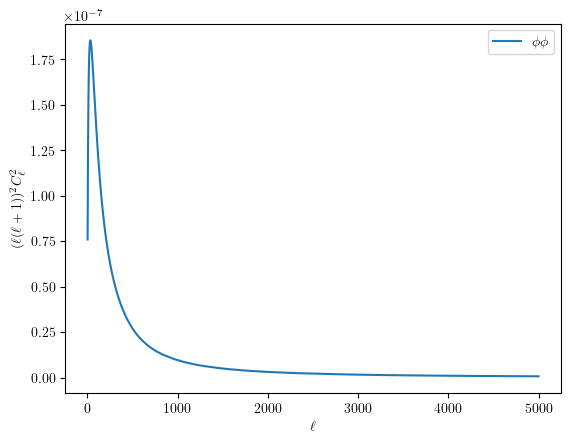

In [10]:
plt.plot(l, test_PP, label = "$\phi\phi$")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$(\ell(\ell+1))^2C_\ell^2$')
plt.legend()